In [ ]:
!conda install numpy matplotlib seaborn -y

In [1]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

p = "А ещё сторонники тоталитаризма в науке могут быть объективно рассмотрены соответствующими инстанциями. Современные технологии достигли такого уровня, что выбранный нами инновационный путь однозначно фиксирует необходимость приоритизации разума над эмоциями. Есть над чем задуматься: предприниматели в сети интернет в равной степени предоставлены сами себе. Также как консультация с широким активом не оставляет шанса для инновационных методов управления процессами. Но постоянное информационно-пропагандистское обеспечение нашей деятельности предопределяет высокую востребованность укрепления моральных ценностей"
k = "Под каждой крышей свои мыши"

def sanitize_str(s):
    return re.sub(r'[^а-я]', '', s.lower().replace('й', 'и').replace('ё', 'е').replace('ъ', 'ь'))

def to_nums(s):
    return list(map(lambda c: ord(c) - ord('а'), s))

p = sanitize_str(p)
k = sanitize_str(k)
p_nums = to_nums(p)
k_nums = to_nums(k)

In [2]:
def make_square(key_nums: list):
    key_nums = list(set(key_nums))
    square = list()
    used_symbs = list()
    symb = 0
    for i in range(5):
        square.append(list())
        for j in range(6):
            ind = i * 6 + j
            curr_symb = None
            if ind < len(key_nums):
                curr_symb = key_nums[ind]
            else:
                while symb in used_symbs:
                    symb += 1
                curr_symb = symb
            square[-1].append(curr_symb)
            used_symbs.append(curr_symb)
    return square

def cypher(p_nums, square):
    c = list()
    for p_num in p_nums:
        for i in range(5):
            if p_num in square[i]:
                x_ind = (i + 1) % len(square)
                y_ind = square[i].index(p_num)
                c_curr = square[x_ind][y_ind]
                c.append(c_curr)
                break
    return c


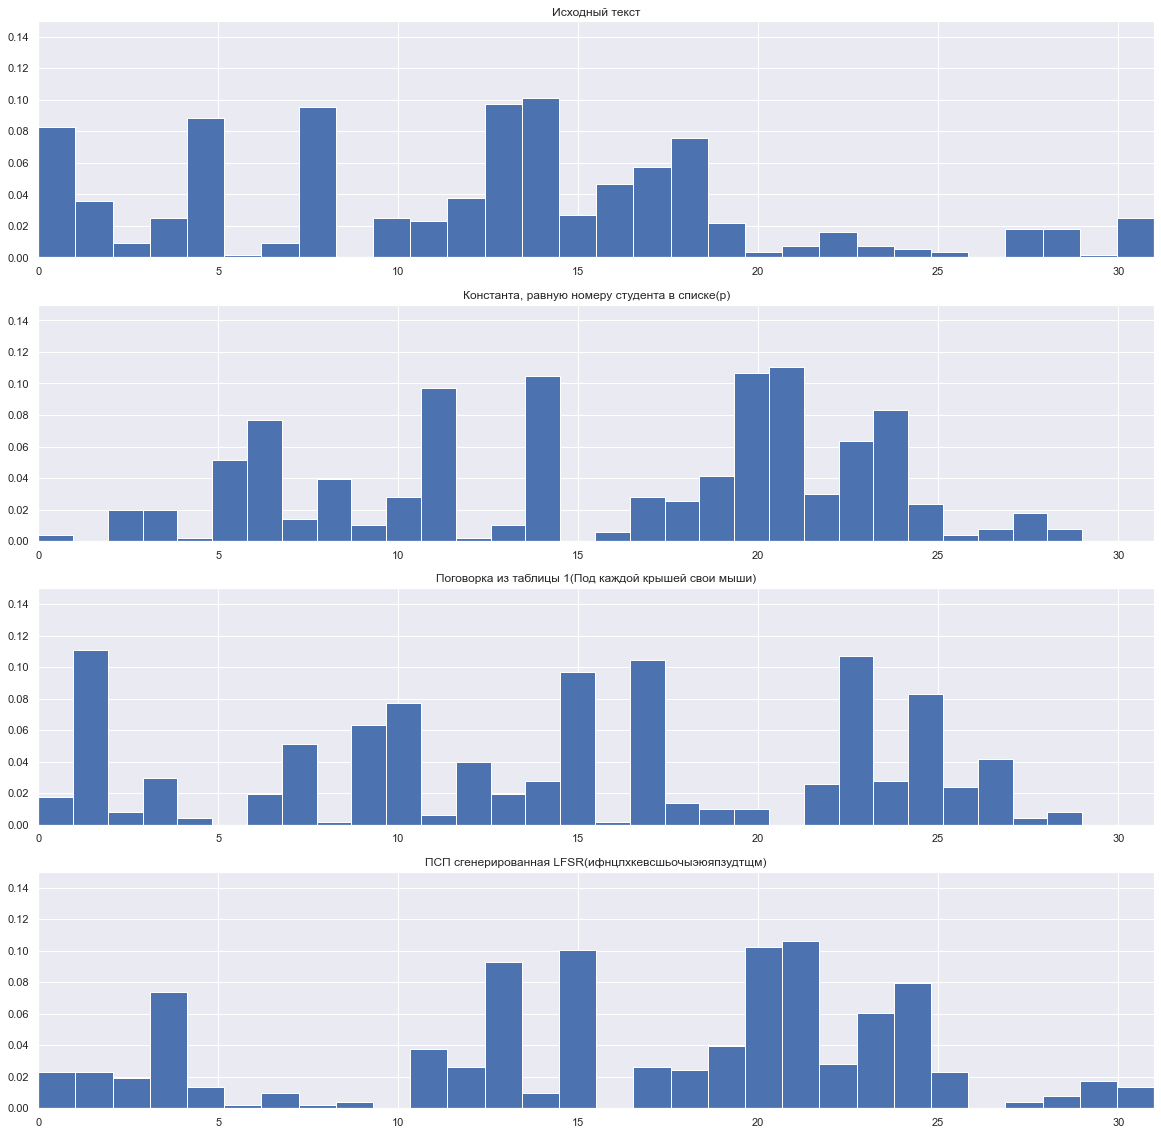

In [3]:
fig, axs = plt.subplots(4, 1, figsize=(20, 20))
results = {}
labels = ['Исходный текст', 'Константа, равную номеру студента в списке(р)', 'Поговорка из таблицы 1(Под каждой крышей свои мыши)', 'ПСП сгенерированная LFSR(ифнцлхкевсшьочыэюяпзудтщм)']
ks = ['', 'р', 'Под каждой крышей свои мыши', 'ифнцлхкевсшьочыэюяпзудтщм']
ks = list(map(lambda k: sanitize_str(k), ks))
for i in range(len(ks)):
    k_nums = to_nums(ks[i])
    square = make_square(k_nums)
    c = cypher(p_nums, square) if len(k_nums) > 0 else p_nums 
    results[labels[i]] = ''.join(list(map(lambda symb: chr(ord('а') + symb), c)))
    axs[i].set_title(labels[i])
    axs[i].set_xlim((0, 31))
    axs[i].set_ylim((0, 0.15))
    axs[i].hist(c, density=True, bins=30)


In [4]:
print(results)

{'Исходный текст': 'аещесторонникитоталитаризмавнаукемогутбытьобьективнорассмотренысоответствующимиинстанциямисовременныетехнологиидостиглитакогоуровнячтовыбранныинамиинновационныипутьоднозначнофиксируетнеобходимостьприоритизацииразуманадэмоциямиестьнадчемзадуматьсяпредпринимателивсетиинтернетвравноистепенипредоставленысамисебетакжекакконсультациясширокимактивомнеоставляетшансадляинновационныхметодовуправленияпроцессаминопостоянноеинформационнопропагандистскоеобеспечениенашеидеятельностипредопределяетвысокуювостребованностьукрепленияморальныхценностеи', 'Константа, равную номеру студента в списке(р)': 'жлалчшхехффосошхшжтошжеонужифжщслухйщшзвшгхзглсшоифхежччухшелфвчххшилшчшищаоуоофчшжфьоуочхиелулффвлшлыфхтхйоокхчшойтошжсхйхщехифэшхивзежффвофжуооффхижьохффвоцщшгхкфхнфжэфхъосчоещлшфлхзыхкоухчшгцеохеошонжьооежнщужфжкдухьоуолчшгфжкэлунжкщужшгчцелкцеофоужшлтоичлшоофшлефлшиежифхочшлцлфоцелкхчшжитлфвчжуочлзлшжсмлсжссхфчщтгшжьочроехсоужсшоихуфлхчшжитлшржфчжктоффхижьохффвыулшхкхищцежитлфоцехьлч